In [ ]:
# dependencies
import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import matplotlib.image as mpim
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# define num_class
num_classes = 10

# load dataset keras will download cifar-10 datset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'x train samples')
print(x_test.shape[0], 'x test samples')

# # # (Optional)Convert class vectors to binary class matrices.
# y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)
# print(y_train.shape[0], 'y train samples')
# print(y_test.shape[0], 'y test samples')

170508288/170498071 [==============================] - 3s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 x train samples
10000 x test samples


In [ ]:
#print shape of classes
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
y_train_f = y_train.flatten()
y_test_f = y_test.flatten()
print('y_train shape:', y_train_f.shape)
print('y_test shape:', y_test_f.shape)

y_train shape: (50000,)
y_test shape: (10000,)


[[Text(0, 0, 'airplane'),
  Text(0, 0, 'automobile'),
  Text(0, 0, 'bird'),
  Text(0, 0, 'cat'),
  Text(0, 0, 'deer'),
  Text(0, 0, 'dog'),
  Text(0, 0, 'frog'),
  Text(0, 0, 'horse'),
  Text(0, 0, 'ship'),
  Text(0, 0, 'truck')]]

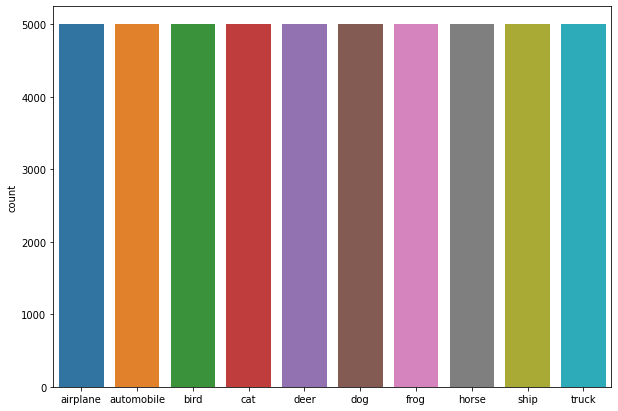

In [ ]:
#check the distribution of classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,7))
p = sns.countplot(y_train_f.flatten())
p.set(xticklabels=classes)

In [ ]:
#Visualize the data

nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
#Normalize the pixels between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [ ]:
np.min(x_train),np.max(x_train)

(0.0, 1.0)

In [ ]:
x_train /= 255
x_test /= 255

In [ ]:
np.min(x_train),np.max(x_train)

(0.0, 0.003921569)

In [ ]:
# Reshape image dimensions from 3 to 1
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train_flat = x_train.reshape(-1,3072)
x_test_flat = x_test.reshape(-1,3072)

In [ ]:
#Applied PCA to the Features of Cifar

pca = PCA()
pca.fit_transform(x_train_flat)

array([[-2.51021720e-02,  1.07023781e-02,  5.88891795e-03, ...,
         2.91363244e-06, -4.61924583e-06, -1.32565685e-06],
       [ 3.25357378e-03, -3.72493314e-03,  2.35440210e-02, ...,
        -2.87687016e-07,  2.25938220e-06, -3.02828562e-06],
       [ 3.03142630e-02, -4.51844484e-02, -1.07985381e-02, ...,
         3.02211834e-06, -8.72167732e-07, -1.54671841e-06],
       ...,
       [ 2.77358410e-03, -4.44801636e-02, -1.54481758e-03, ...,
         1.62595643e-06,  7.31069122e-06,  5.67652660e-06],
       [ 4.45796959e-02, -1.32387802e-02,  2.18281411e-02, ...,
         2.28247657e-07,  2.88637148e-06, -6.55582699e-06],
       [ 1.64419990e-02, -4.64357063e-03, -1.74352396e-02, ...,
        -3.65694041e-06,  9.53823132e-07, -1.08534884e-07]], dtype=float32)

In [ ]:
pca.explained_variance_.shape

(3072,)

In [ ]:
# Calculating optimal k

k = 0
total = sum(pca.explained_variance_)
current_sum = 0

while(current_sum / total < 0.98):
    current_sum += pca.explained_variance_[k]
    k += 1
k

444

In [ ]:
## Applying PCA with k calcuated above

pca = PCA(n_components=k, whiten=True, svd_solver='randomized')

x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

Logistic Regression

In [ ]:
## Training 
lr = LogisticRegression()
lr.fit(x_train_pca, y_train)

LogisticRegression()

In [ ]:
## Predicting
y_pred_lr = lr.predict(x_test_pca)
logistic_regression_score = accuracy_score(y_test, y_pred_lr)
logistic_regression_score

0.4104

Support Vector Machine

In [ ]:
## Training
svc = svm.SVC()
svc.fit(x_train_pca, y_train)

SVC()

In [ ]:
# Predicting 
y_pred_svm = svc.predict(x_test_pca)
svc_score = accuracy_score(y_test, y_pred_svm)
svc_score

0.5146

Random Forest

In [ ]:
#Training

rf = RandomForestClassifier()
rf.fit(x_train_pca, y_train)

RandomForestClassifier()

In [ ]:
# Predicting

y_pred_rf = rf.predict(x_test_pca)

random_forest_score = accuracy_score(y_test, y_pred_rf)
random_forest_score

0.4119

K-Neighbours

In [32]:
# Train 
knn = KNeighborsClassifier()
knn.fit(x_train_pca, y_train)

KNeighborsClassifier()

In [33]:
# Prediction
y_pred_knn = knn.predict(x_test_pca)

knn_score = accuracy_score(y_test, y_pred_knn)
knn_score

0.1733

Comparing all the models

In [34]:
print("RandomForest ", random_forest_score)
print("SVM : ", svc_score)
print("KNN ", knn_score)
print("Logistic Regression : ", logistic_regression_score)

RandomForest  0.4119
SVM :  0.5146
KNN  0.1733
Logistic Regression :  0.4104


In [36]:
name = []
for i in range(len(y_pred_svm)):
    name.append(classes[y_pred_svm[i]])

In [37]:
np.savetxt("svmPred.csv", name, fmt = '%s')